<a href="https://colab.research.google.com/github/khaled-222/CodeAlpha_Datascience/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import files
uploaded = files.upload()
k=list(uploaded.keys())

df =pd.read_csv(io.BytesIO(uploaded[k[0]]))

Saving car data.csv to car data (4).csv


In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df['loss']=1-(df['Selling_Price']/df['Present_Price'])
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,loss
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0.400716
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0.502096
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0.263959
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0.313253
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0.330422
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,0.181034
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0.322034
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,0.695455
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,0.080000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   loss           301 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 23.6+ KB


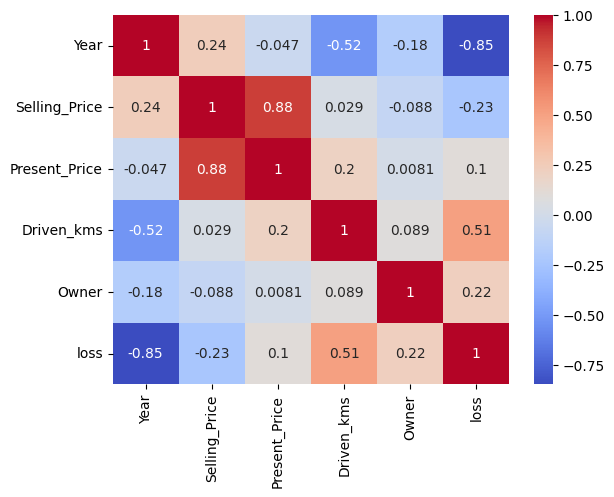

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
corr = df["Year"].corr(df["loss"])
print("Correlation:", corr)

Correlation: -0.8463876680306359


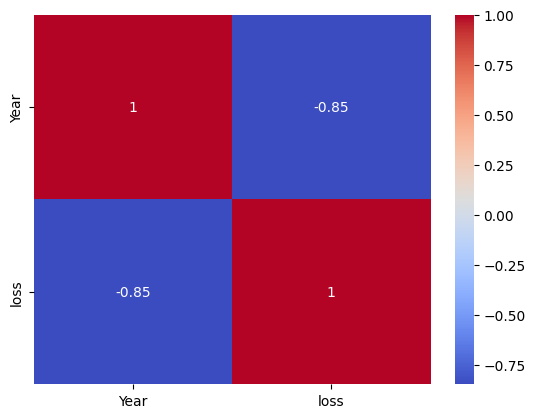

In [ ]:
sns.heatmap(df[['Year','loss']].corr(), annot=True, cmap="coolwarm")
plt.show()

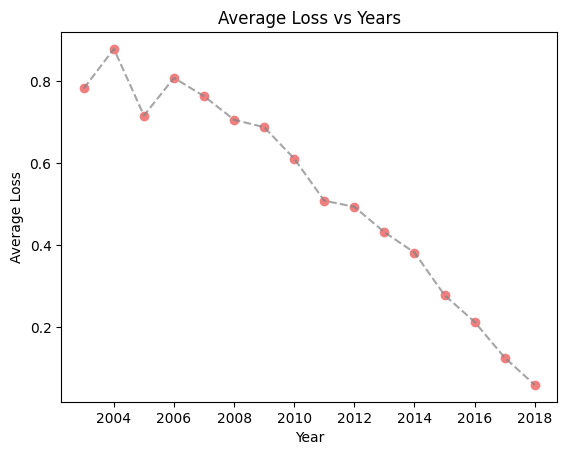

In [ ]:
# Group by Year and calculate mean loss
grouped = df.groupby('Year')['loss'].mean().reset_index()

# Scatter or line plot
plt.scatter(grouped['Year'], grouped['loss'], color='lightcoral')
plt.plot(grouped['Year'], grouped['loss'], color='gray', linestyle='--', alpha=0.7)  # optional trend line
plt.title('Average Loss vs Years')
plt.xlabel('Year')
plt.ylabel('Average Loss')
plt.box(True)
plt.show()


In [ ]:
X=df[['Year']]
y=df['loss']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

R² Score: 0.722998715320684
MSE: 0.012829672603879155
Coefficient (Slope): -0.05820738166140365
Intercept: 117.57327016378761


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


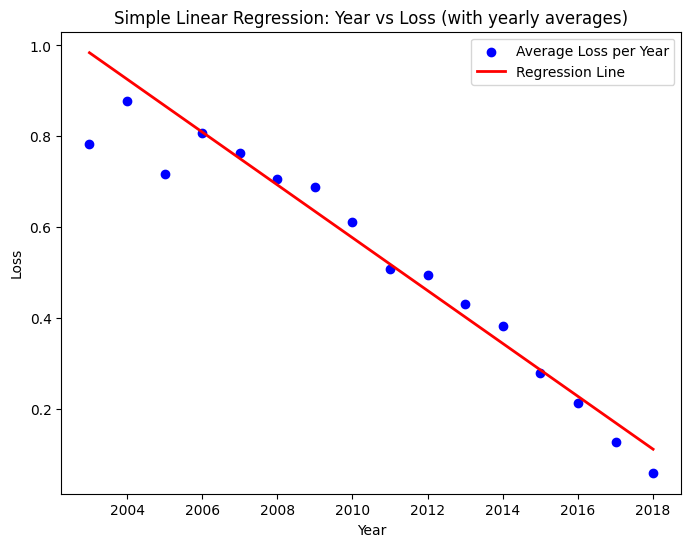

In [ ]:
# --- Train model on raw data (no grouping) ---
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

# Metrics (still raw data, R² unchanged)
print("R² Score:", r2_score(Y_test, Y_pred))
print("MSE:", mean_squared_error(Y_test, Y_pred))
print("Coefficient (Slope):", lr.coef_[0])
print("Intercept:", lr.intercept_)

# --- For visualization: group by Year (but don't retrain model) ---
df_grouped = df.groupby("Year")["loss"].mean().reset_index()

# Predict regression line across full range of years
X_range = np.linspace(df["Year"].min(), df["Year"].max(), 100).reshape(-1, 1)
y_range_pred = lr.predict(X_range)

# --- Plot ---
plt.figure(figsize=(8,6))

# Grouped averages (blue scatter)
plt.scatter(df_grouped["Year"], df_grouped["loss"], color="blue", label="Average Loss per Year")

# Regression line (red)
plt.plot(X_range, y_range_pred, color="red", linewidth=2, label="Regression Line")

plt.xlabel("Year")
plt.ylabel("Loss")
plt.title("Simple Linear Regression: Year vs Loss (with yearly averages)")
plt.legend()
plt.show()


In [ ]:
X1 = df[['Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Year']]
y1 = df['loss']

In [ ]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Driven_kms', 'Year']


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

R² Score: 0.7324304868360956
MSE: 0.012392827912861162
RMSE: 0.11132307897673852


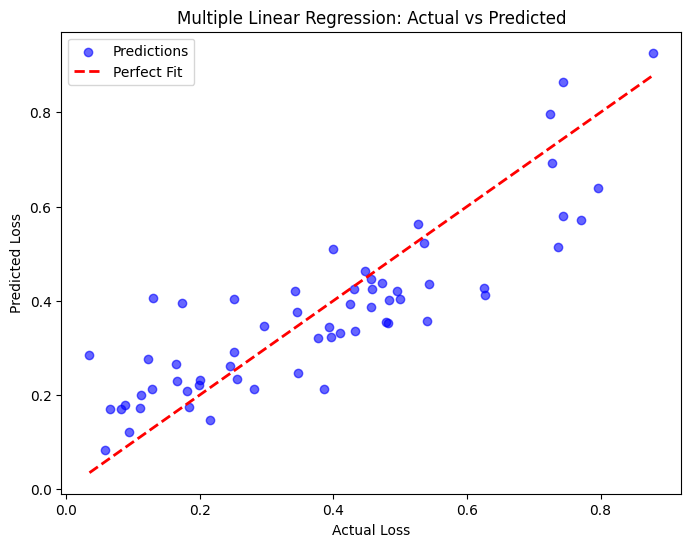

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Fit model
model.fit(X1_train, y1_train)

# Predict
y1_pred = model.predict(X1_test)

# Evaluate
print("R² Score:", r2_score(y1_test, y1_pred))
mse = mean_squared_error(y1_test, y1_pred)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

plt.figure(figsize=(8,6))
plt.scatter(y1_test, y1_pred, alpha=0.6, color="blue", label="Predictions")
plt.plot([y1_test.min(), y1_test.max()],
         [y1_test.min(), y1_test.max()],
         'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Loss")
plt.ylabel("Predicted Loss")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()


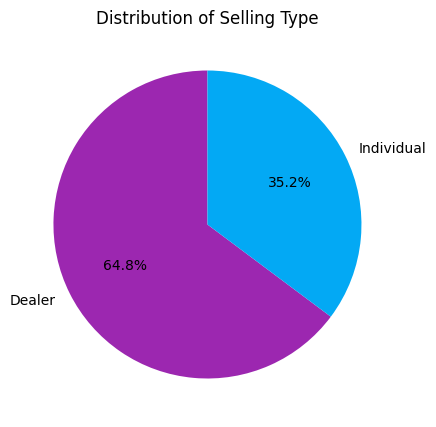

In [ ]:
selling_counts = df['Selling_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(5,5))
plt.pie(selling_counts, labels=selling_counts.index, autopct='%1.1f%%', startangle=90,colors=["#9C27B0", "#03A9F4"])
plt.title("Distribution of Selling Type")
plt.show()

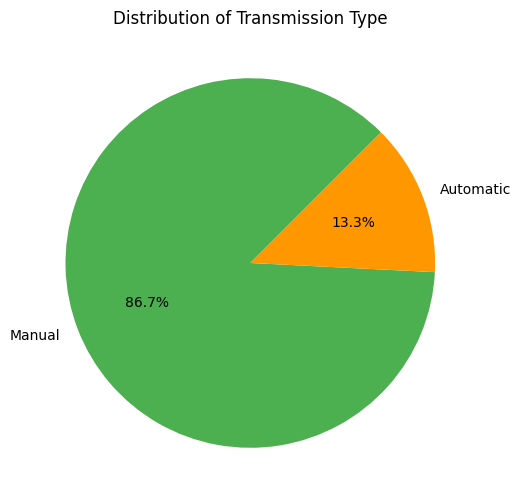

In [ ]:
transmission_counts = df['Transmission'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=45,colors=["#4CAF50", "#FF9800", "#2196F3"] )
plt.title("Distribution of Transmission Type")
plt.show()